# Generate Insight from Cluster

after obtaining points from summaring text process, we can reduce the amount of sentences which we have to observe. However, as some of the clusters still contains more than 1000 sentences, it is best to use wordcloud to help us gain insight about the sentences.

#### *Import packages*

In [5]:
import pandas as pd
import numpy as np
from dateutil import parser
import statistics
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from PIL import Image

#### *Import clustered titles*

In [15]:
pd.concat([processed_title, unprocessed_title]).shape

(106386, 10)

In [13]:
proms_df.created_at.parser.parse(proms_df.created_at)

TypeError: Parser must be a string or character stream, not Series

In [7]:
proms_df = pd.read_csv("CSV/PROMS_API_EXTRA.csv")
processed_title = pd.read_csv("CSV/processed_titles.csv")
unprocessed_title = pd.read_csv("CSV/unprocessed_titles.csv")
clustered_title = pd.read_csv("CSV/cluster_title_2.csv")

proms_df["processed_title"] = pd.read_csv("Stemmed_Result/stemmed_title.txt").title
proms_df["processed_remarks"] = pd.read_csv("Stemmed_Result/stemmed_remarks.txt").remarks
proms_df = proms_df[(proms_df.processed_title.isnull() == False) & (proms_df.processed_remarks.isnull() == False)].reset_index(drop=True)
new_proms_df = pd.concat([processed_title, unprocessed_title])[["title", "created_at"]]
proms_df.merge(new_proms_df, how="inner", on="created_at")

,title_x,remarks,time_to_completion,complexity,related_parties,score,created_at,office,division,word_count,processed_title,processed_remarks,title_y
0,Terms negotiation with Pak Yoel for Tomorrow's...,"Can a trade deal be done by today, 5 Jan 21 \r...",1,3,3,20.0,2021-01-05T14:26:38.000000Z,"Tamara, Jakarta",Fund Administration & Operasional,43,terms negotiation with pak yoel for tomorrow sub,can trade deal be done by today jan subs of id...,terms negotiation with pak yoel for tomorrow sub
1,Input Transaksi Autodebet BCA 05 Januari 2021,"Transaksi Autodebet Ultima Ekuitas, Flexi Plus...",1,2,2,10.0,2021-01-05T16:16:48.000000Z,"Tamara, Jakarta",Fund Administration & Operasional,9,input transaksi autodebet bca januari,transaksi autodebet ultima ekuitas flexi plus ...,transaction
2,"Checking Subscription, Redemption, dan Switch",Total transaksi harian HPAM dan APERD:\r\nSubs...,1,3,2,14.0,2021-01-05T16:19:16.000000Z,"Tamara, Jakarta",Fund Administration & Operasional,15,checking subscription redemption dan switch,total transaksi hari hpam dan aperd subscripti...,checking subscription redemption dan switch
3,Kirim email unit confirmation letter,Kirim confirmation letter harian ke admin caba...,1,1,3,9.0,2021-01-05T16:22:21.000000Z,"Tamara, Jakarta",Fund Administration & Operasional,9,kirim email unit confirmation letter,kirim confirmation letter hari ke admin cabang...,kirim email unit confirmation letter
4,Kirim batch transaksi harian ke BK,"Email batch transaksi subscription, redemption...",1,2,2,9.0,2021-01-05T16:24:08.000000Z,"Tamara, Jakarta",Fund Administration & Operasional,10,kirim batch transaksi hari ke bk,email batch transaksi subscription redemption ...,transaction
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107515,Visit Nasabah Existing,"An. Shella Ng, mengambil dokumen sekaligus ngo...",1,1,1,2.0,2022-02-11T11:40:40.000000Z,Medan,Marketing Ritel,7,visit nasabah existing,an shella ng ambil dokumen sekaligus ngobrol,visit
107516,Visit Nasabah Existing,"An. Yuki Agustwo, visit perkenalan dgn nsbh",1,1,1,2.0,2022-02-11T11:43:14.000000Z,Medan,Marketing Ritel,7,visit nasabah existing,an yuk agustwo visit kenal dgn nsbh,visit
107517,Visit Nasabah Existing,"An. Ria Natalina, visit perkenalan dgn nasabah.",1,1,1,2.0,2022-02-11T11:45:35.000000Z,Medan,Marketing Ritel,7,visit nasabah existing,an ria natalina visit kenal dgn nasabah,visit
107518,Visit Nasabah Existing,"An. Nita Sofiani, ngobrol dgn nasabah udah tak...",1,1,1,2.0,2022-02-11T11:47:26.000000Z,Medan,Marketing Ritel,9,visit nasabah existing,an nita sofiani ngobrol dgn nasabah udah takin...,visit


## Summarized Titles

Using points gained from summrizing text process, we filter out the data in a cluster to only be the representative of all the sentences in our data. As summarizing text process takes hours or even days depending on how many sentences that we are processing, I decided to call the saved result of the summarized texts.

#### *Embedding points to titles*

In [25]:
title_point = pd.concat([pd.Series(clustered_title[clustered_title.cluster_7 == 0].title.reset_index(drop=True).unique()), 
                        pd.read_csv("CSV/Summarized_CSV/Cluster_7/title_7_0_points.csv")], 
                        axis=1).rename(columns={0:"unique_title"})
title_point

,unique_title,point
0,terms negotiation with pak yoel for tomorrow sub,358
1,kirim email unit confirmation letter,606
2,kirim nav hari ke nasabah,864
3,laku rekap mutasi rekening reksa dana bulan,355
4,kirim instruksi bayar iklan ke bk,936
...,...,...
13990,ptijk,0
13991,rekap hari fund admin,342
13992,chat kantor pusat retail,153
13993,beli perlu hampers utk nasabah,838


#### *Filter out less important sentences*

In [27]:
average_point = sum(title_point.point)/len(title_point.point)
important_titles = title_point[title_point.point > 1.2*average_point].reset_index(drop=True)
test = important_titles.sort_values("point", ascending=False)
test

,unique_title,point
4787,maintan nasabah,1402
2829,lkp nasabah,1402
1333,switching nasabah mba puji,1402
1322,switch nasabah erna david clara,1402
1317,switching nasabah,1402
...,...,...
2918,hitung insentif jbs desember bandung,362
2922,hitung insentif jbs desember surabaya,362
1888,draf hitung insentif korporasi,362
1951,ppt hitung insentif,362


## Generate Wordclouds

As we can see above, the cluster which we summarized still have more than 1000 rows of data which will be too hard to read all the sentences one by one. Thus, we shall plot a Wordcloud chart to help us gain insights of the data in each clusters of every cluster groups.

#### *Plotting wordclouds*

In [20]:
bahasaStopwords = StopWordRemoverFactory().get_stop_words()

for cluster_group in clustered_title.drop(columns=["title"]).columns.str.extract("(\d+)")[0]:
    
    y = np.ceil(np.sqrt(int(cluster_group)))
    x = np.ceil(np.sqrt(int(cluster_group)))
    fig = plt.figure(figsize=(y*10, (x-1)*10))
    
    gs = GridSpec(nrows=int(y), ncols=int(x))
    i = 0
    j = 0
    
    for cluster in clustered_title["cluster_" + str(cluster_group)].sort_values().unique():
        ax = fig.add_subplot(gs[i, j])
        i = i + 1
        if i > y-1:
            i = 0
            j = j + 1
            
        title_point = pd.concat([pd.Series(clustered_title[clustered_title["cluster_" + str(cluster_group)] == cluster].title.reset_index(drop=True).unique()), 
                                pd.read_csv("CSV/Summarized_CSV/Cluster_" + str(cluster_group) + "/title_" + str(cluster_group) + "_" + str(cluster) + "_points.csv")], 
                                axis=1).rename(columns={0:"unique_title"})
        
        average_point = sum(title_point.point)/len(title_point.point)
        important_titles = title_point[title_point.point > 1.2*average_point].reset_index(drop=True)
            
        word_list = []
        for words in important_titles.unique_title.str.split():
            word_list.extend(words)
        word_list = pd.DataFrame(pd.Series(word_list).value_counts().rename("freq")).reset_index().rename(columns={"index": "word"})
        
        ax.imshow(WordCloud(max_font_size=50, max_words=50, background_color="black", colormap="Set2", collocations=False, random_state=126).\
            generate(word_list[~word_list.word.isin(bahasaStopwords)].word.to_string()), interpolation='bilinear')
        plt.title("Cluster_6: {}".format(cluster))
        plt.axis("off")

    plt.savefig("Picture/cluster_" + str(cluster_group) + "_wordcloud.png")
    plt.close()

C:\Users\itlic\AppData\Local\Temp\ipykernel_3088\3584695268.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  word_list = pd.DataFrame(pd.Series(word_list).value_counts().rename("freq")).reset_index().rename(columns={"index": "word"})
C:\Users\itlic\AppData\Local\Temp\ipykernel_3088\3584695268.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  word_list = pd.DataFrame(pd.Series(word_list).value_counts().rename("freq")).reset_index().rename(columns={"index": "word"})


#### *Insight we can get from wordcloud*

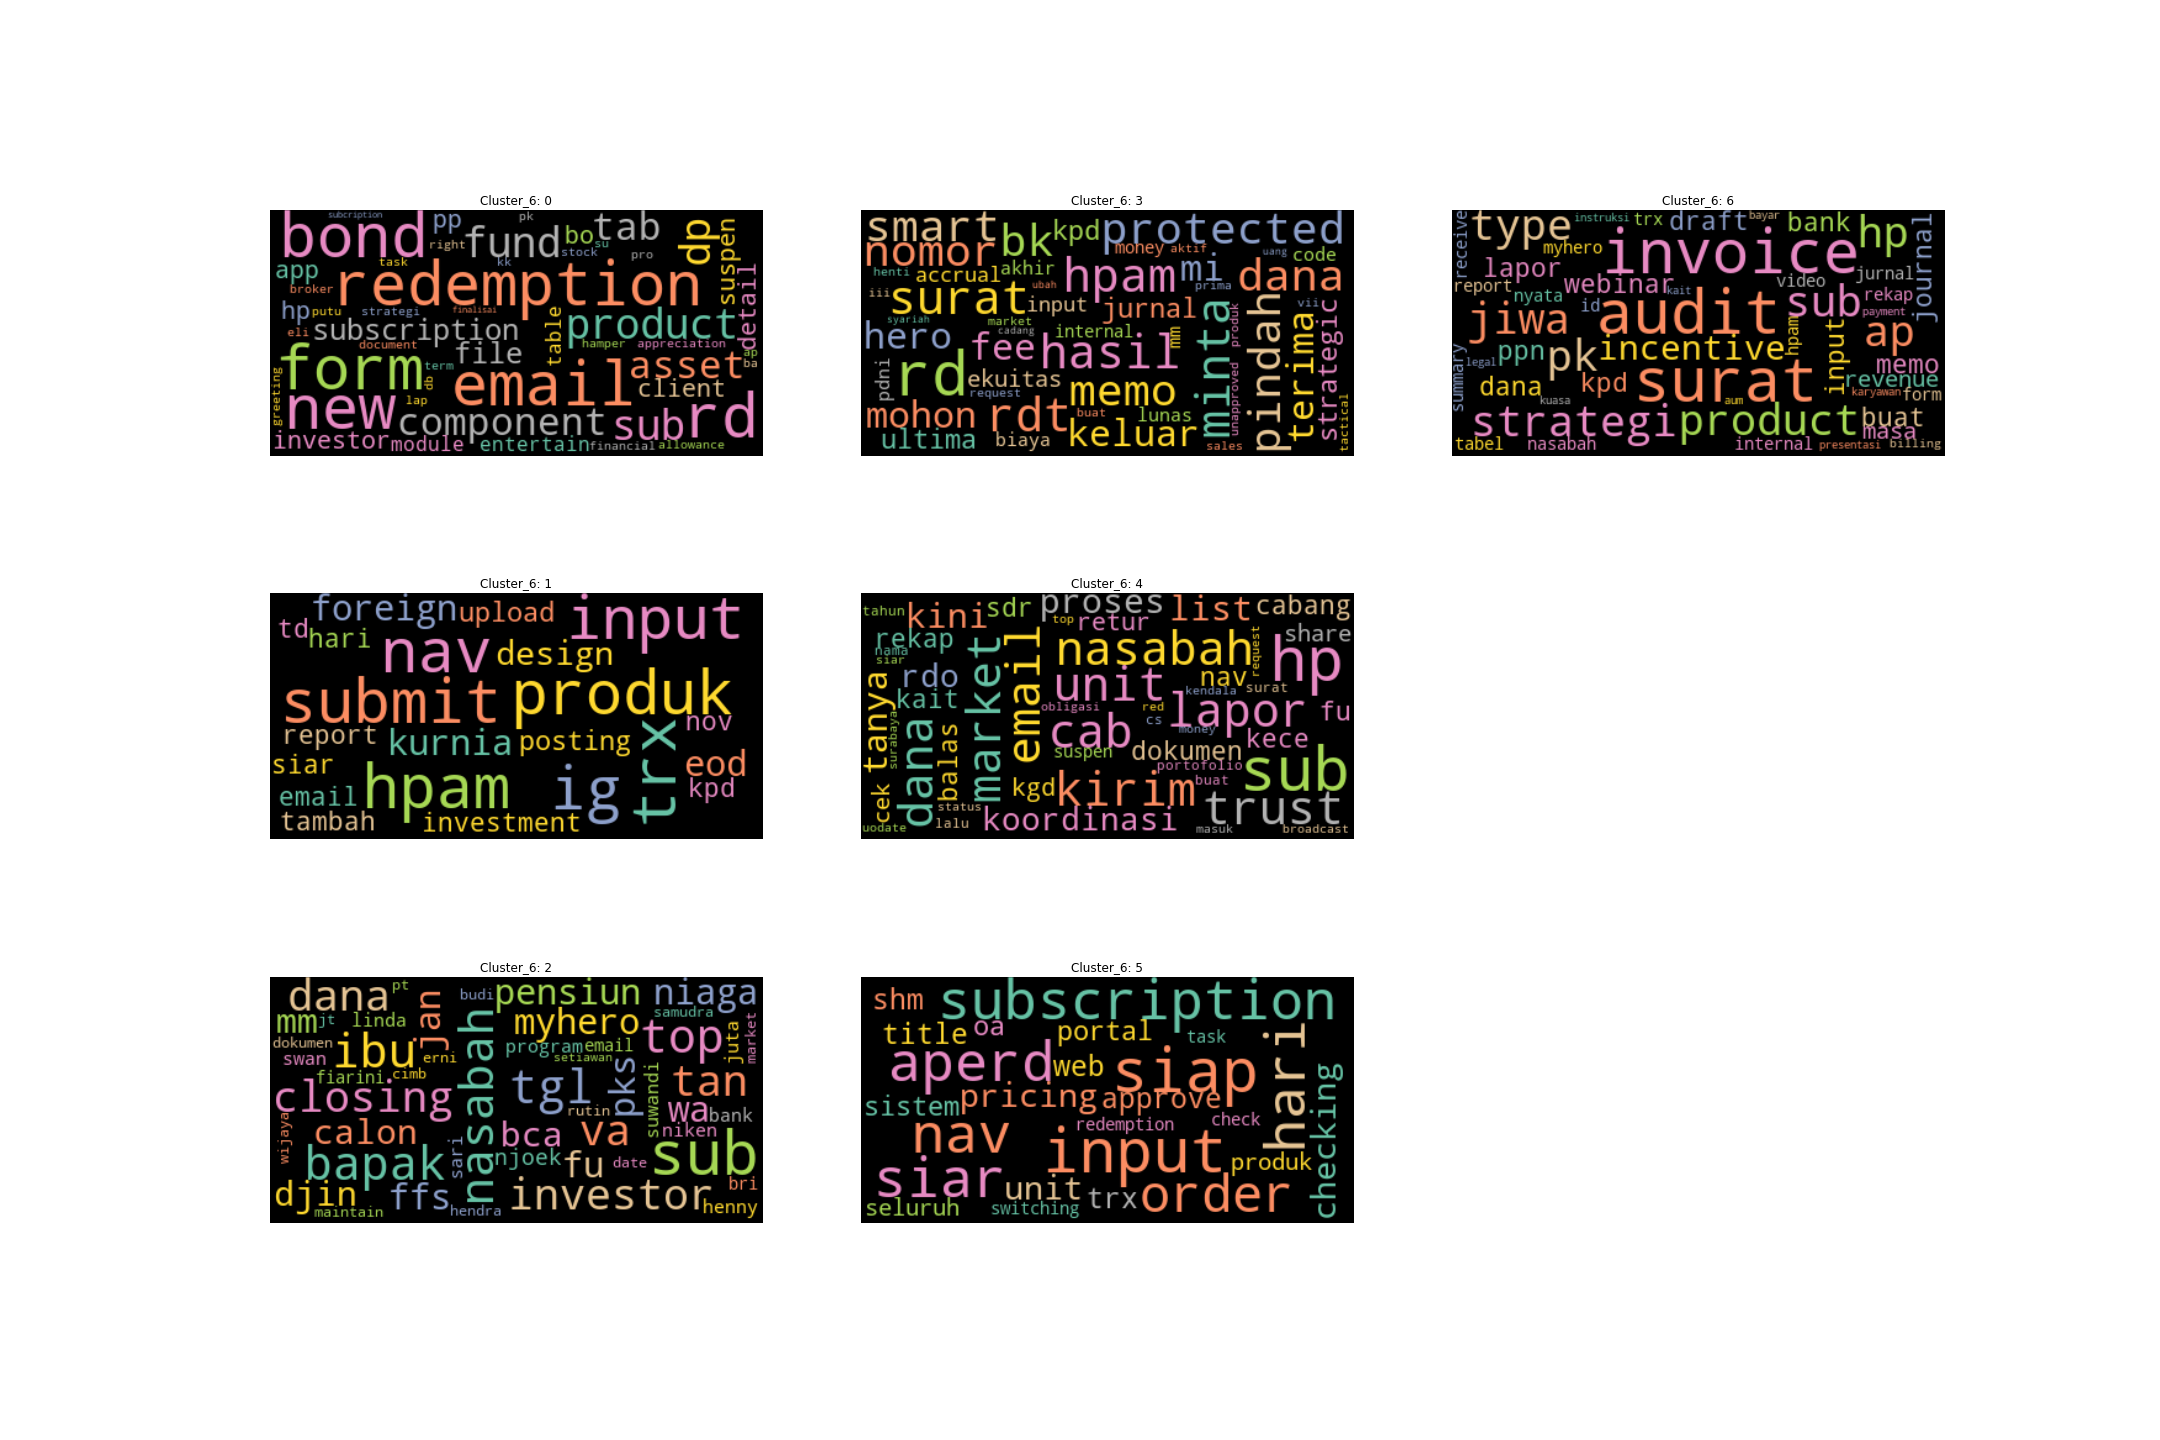

In [21]:
Image.open("Picture/cluster_7_wordcloud.png")

Above we can see the generated wordcloud from a total of 6 clusters. The first cluster seems to be about sending information about 